# KNN실습

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
classifier = KNeighborsClassifier(n_neighbors = 3) #k의 개수
training_points = [
[0.5, 0.2, 0.1],
[0.9, 0.7, 0.3],
[0.4, 0.5, 0.7]
]
training_labels = [0, 1, 1] #각각의 라벨을 지정 0.5 0.9 0.4 >> 0 이런식으로
classifier.fit(training_points, training_labels) #fit =  결과내주는거
unknown_points = [
[0.2, 0.1, 0.7]
]
guesses = classifier.predict(unknown_points) #predict = 예측하는거

print(guesses) #1로 예측이 됐다~

[1]


In [18]:
training_points = [
[158, 58],
[158, 59],
[158, 63],
[160, 59],
[160, 60],
[163, 60],
[163, 61],
[160, 64],
[163, 64],
[165, 61],
[165, 62],
[165, 65],
[168, 62],
[168, 63],
[168, 66],
[170, 63],
[170, 64],
[170, 68]
]

training_label = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#label = m 은 0으로 label = L 은 1로

unknown_points = [[161,61],]
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(training_points, training_label)
guesses = classifier.predict(unknown_points)
print(guesses)

[0]


# train-test split

In [19]:
from sklearn.model_selection import train_test_split

In [67]:
training_points = [
[158, 58],
[158, 59],
[158, 63],
[160, 59],
[160, 60],
[163, 60],
[163, 61],
[160, 64],
[163, 64],
[165, 61],
[165, 62],
[165, 65],
[168, 62],
[168, 63],
[168, 66],
[170, 63],
[170, 64],
[170, 68]
]
training_labels = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.2, random_state=4)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)

[1 0 1 1]


# 분류 모델 성능 평가지표

In [43]:
# F로 시작하면 오분류(FP,FN) # T는 분류는 맞았고
#P는 1로 N은 0으로

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [68]:
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))
print(metrics.precision_score(y_test, guesses, average='binary'))
print(metrics.recall_score(y_test, guesses, average='binary'))
print(metrics.f1_score(y_test, guesses, average='binary'))

[[1 1]
 [0 2]]
0.75
0.6666666666666666
1.0
0.8


In [77]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
training_points = cancer.data 
training_labels = cancer.target
#숫자로 되어있기 때문에 그냥 분석 실시하면 됨 (처리x)


X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.2, random_state=4)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(confusion_matrix(y_test, guesses))
print("accuracy: ",round(metrics.accuracy_score(y_test, guesses),2))
print("error rate:",round(1 - metrics.accuracy_score(y_test, guesses),2))
print("precision: ",round(metrics.precision_score(y_test, guesses, average='binary'),2))
print("recall: ",round(metrics.recall_score(y_test, guesses, average='binary'),2))
print("f1: ",round(metrics.f1_score(y_test, guesses, average='binary'),2))

[[29  5]
 [ 9 71]]
accuracy:  0.88
error rate: 0.12
precision:  0.93
recall:  0.89
f1:  0.91


# 빅데이터 분석의 일련과정
### 라이브러리 로드

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### 데이터 로드 및 관찰

In [87]:
df = pd.read_csv('Heart.csv')
print(df.head())
print(df.info())
print(df.shape)
print(df.isnull().sum())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 

In [88]:
df_n = df.dropna()
## 결측치 없애기
print(df_n.head())
print(df_n.info())
print(df_n.shape)
print(df_n.isnull().sum())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 

### 데이터 전처리(str >> numeric)

In [91]:
le = LabelEncoder()
ChestPain_encoded = le.fit_transform(df_n['ChestPain'])
Thal_encoded = le.fit_transform(df_n['Thal'])
AHD_encoded = le.fit_transform(df_n['AHD'])
df_n['ChestPain_encoded'] = ChestPain_encoded
df_n['Thal_encoded'] = Thal_encoded
df_n['AHD_encoded'] = AHD_encoded
df_n = df_n.drop(columns = ['ChestPain','Thal','AHD'])

print(df_n.head())

   Unnamed: 0  Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0           1   63    1     145   233    1        2    150      0      2.3   
1           2   67    1     160   286    0        2    108      1      1.5   
2           3   67    1     120   229    0        2    129      1      2.6   
3           4   37    1     130   250    0        0    187      0      3.5   
4           5   41    0     130   204    0        2    172      0      1.4   

   Slope   Ca  ChestPain_encoded  Thal_encoded  AHD_encoded  
0      3  0.0                  3             0            0  
1      2  3.0                  0             1            1  
2      2  2.0                  0             2            1  
3      3  0.0                  1             1            0  
4      1  0.0                  2             1            0  


<ipython-input-91-fc6ba91801b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['ChestPain_encoded'] = ChestPain_encoded
<ipython-input-91-fc6ba91801b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['Thal_encoded'] = Thal_encoded
<ipython-input-91-fc6ba91801b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

### 그래프 그려서 이상치 및 다른 정보 알아보기

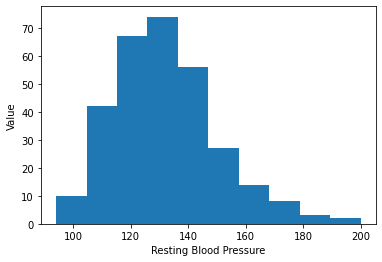

In [93]:
plt.hist(df['RestBP'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

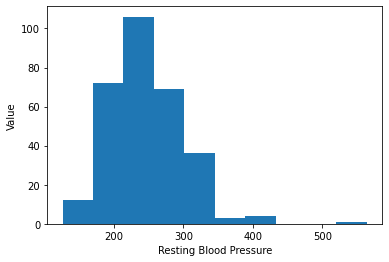

In [94]:
plt.hist(df['Chol'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

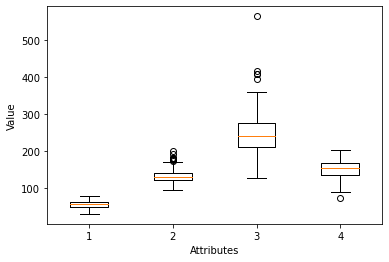

In [96]:
data_to_boxplot = [df['Age'], df['RestBP'], df['Chol'],df['MaxHR']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

### train - test set  나누기

In [100]:
training_points = df_n.drop(columns=['AHD_encoded'])
training_labels = df_n['AHD_encoded']

X_train, X_test, y_train, y_test = train_test_split(training_points,training_labels,test_size=0.3,random_state=4)

### accuracy 확인 및 최적의 정확도 찾기

In [103]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[26 16]
 [23 25]]
0.5666666666666667


##### K를 조절하여 정확도 개선

max_k: 23
max: 0.6666666666666666
f1:  0.49


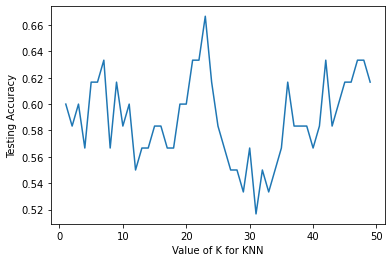

In [115]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print("max_k:", accuracy_scores.index(max(accuracy_scores))+1)
print("max:", max(accuracy_scores))
print("f1: ",round(metrics.f1_score(y_test, guesses, average='binary'),2))

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

##### Training, Test set proportion 변경

max_k: 23
max: 0.6666666666666666
f1:  0.49


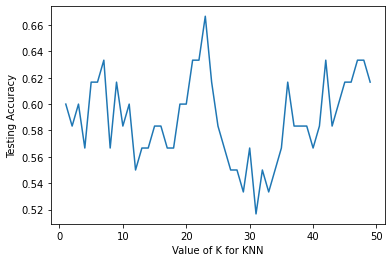

In [116]:
training_points = df_n.drop(columns=['AHD_encoded'])
training_labels = df_n['AHD_encoded']

X_train, X_test, y_train, y_test = train_test_split(training_points,training_labels,test_size=0.2,random_state=4)

k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print("max_k:", accuracy_scores.index(max(accuracy_scores))+1)
print("max:", max(accuracy_scores))
print("f1: ",round(metrics.f1_score(y_test, guesses, average='binary'),2))

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

##### standardization, nomalization 으로 성능향상

max_k: 3
max: 0.7
f1:  0.21


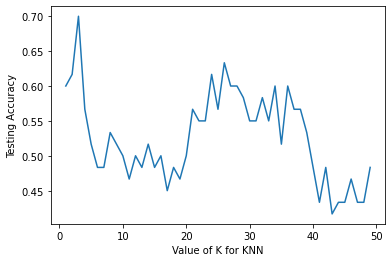

In [136]:
## Standardzation
df_model = df_n.copy()

scaler = StandardScaler()

features = [['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['AHD_encoded'])
training_labels = df_model['AHD_encoded']

X_train, X_test, y_train, y_test = train_test_split(training_points,training_labels,test_size=0.2,random_state=4)

k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print("max_k:", accuracy_scores.index(max(accuracy_scores))+1)
print("max:", max(accuracy_scores))
print("f1: ",round(metrics.f1_score(y_test, guesses, average='binary'),2))

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

max_k: 1
max: 0.65
f1:  0.21


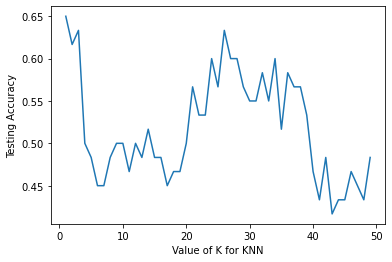

In [138]:
df_model = df_n.copy()

scaler = MinMaxScaler()

features = [['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['AHD_encoded'])
training_labels = df_model['AHD_encoded']

X_train, X_test, y_train, y_test = train_test_split(training_points,training_labels,test_size=0.2,random_state=4)

k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print("max_k:", accuracy_scores.index(max(accuracy_scores))+1)
print("max:", max(accuracy_scores))
print("f1: ",round(metrics.f1_score(y_test, guesses, average='binary'),2))

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()